In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
cash1 =  pd.read_csv('../project_dataset/cash_request.csv')
cash1.set_index(['id'], inplace=True)
cash1.head()

,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
id,,,,,,,,,,,,,,,
5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [117]:
cash = cash1.copy()
cash.head()


,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
id,,,,,,,,,,,,,,,
5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [118]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'],unit='ns')
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'],unit='ns')
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'],unit='ns')
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'],unit='ns')
cash['send_at'] = pd.to_datetime(cash['send_at'],unit='ns')
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'],unit='ns')
cash['reco_last_update'] = pd.to_datetime(cash['reco_last_update'],unit='ns')

In [119]:
# Reemplazar NaN en user_id con los valores de deleted_account_id
cash['user_id'].fillna(cash['deleted_account_id'])
# Create month and cohorte column
cash.sort_values(by='user_id', inplace=True)
cash['YM'] = cash['created_at'].dt.to_period('M')
cash['cohortes'] = cash.groupby('user_id')['YM'].transform('min')
cash[['cohortes', 'YM', 'user_id']].head(10)

C:\Users\Toni\AppData\Local\Temp\ipykernel_19304\1333813071.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['YM'] = cash['created_at'].dt.to_period('M')


,cohortes,YM,user_id
id,,,
1302,2020-04,2020-04,34.0
758,2019-12,2020-02,35.0
510,2019-12,2020-01,35.0
12794,2019-12,2020-08,35.0
150,2019-12,2019-12,35.0
326,2019-12,2019-12,35.0
16860,2019-12,2020-09,35.0
918,2019-12,2020-03,35.0
10942,2019-11,2020-08,47.0


<Axes: title={'center': 'Income por cohorte'}, xlabel='Cohortes', ylabel='Total Amount'>

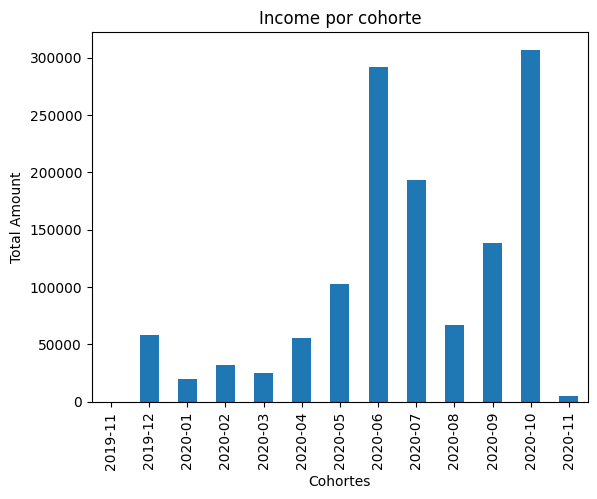

In [120]:
# Income generated per cohorte
income_cohorte = cash[cash['status'] == 'money_back'].groupby('cohortes')['amount'].sum()
income_cohorte.plot(kind='bar', ylabel= 'Total Amount', xlabel='Cohortes', title='Income por cohorte')

In [121]:
cohort_data = cash.groupby('cohortes')['amount'].sum().reset_index()
cohort_data

,cohortes,amount
0,2019-11,232.0
1,2019-12,84781.0
2,2020-01,31104.0
3,2020-02,39777.0
4,2020-03,31555.0
5,2020-04,79244.0
6,2020-05,134658.0
7,2020-06,425531.0
8,2020-07,320877.0
9,2020-08,116750.0


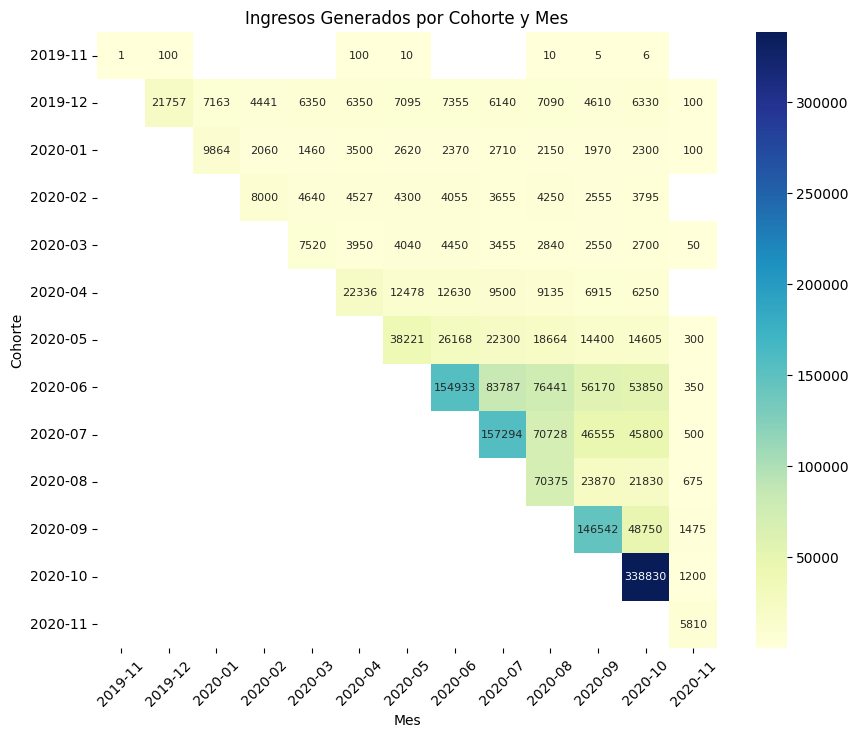

In [122]:
# Crear una tabla pivote de ingresos por cohorte y mes
ingresos_pivot = cash.pivot_table(index='cohortes', columns='YM', values='amount', aggfunc='sum')
#cohort_revenue = cash.pivot(index='cohortes', columns='YM', values='amount')
# Ajustar el tamaño de la fuente
plt.figure(figsize=(10, 8))
sns.heatmap(ingresos_pivot, cmap="YlGnBu", annot=True, fmt=".0f", annot_kws={"size": 8}) # Tamaño de fuente reducido para que se vea bien
plt.title('Ingresos Generados por Cohorte y Mes')
plt.xlabel('Mes')
plt.ylabel('Cohorte')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

plt.show()